In [25]:
import numpy as np
import matplotlib.pyplot  as plt
import random as random

In [20]:
X_train=np.loadtxt('train_X.csv',delimiter=',').T
Y_train=np.loadtxt('train_label.csv',delimiter=',').T

X_test=np.loadtxt('test_X.csv',delimiter=',').T
Y_test=np.loadtxt('test_label.csv',delimiter=',').T

In [22]:
print("shape of X_train:", X_train.shape)
print("shape of Y_train:" ,Y_train.shape)

shape of X_train: (784, 1000)
shape of Y_train: (10, 1000)


In [23]:
print("shape of X_test:", X_test.shape)
print("shape of Y_test:", Y_test.shape)

shape of X_test: (784, 350)
shape of Y_test: (10, 350)


# Vislualising Our Data

<function matplotlib.pyplot.show(close=None, block=None)>

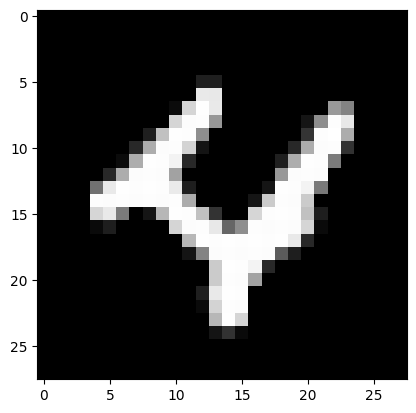

In [46]:
index=int(random.randrange(0,X_train.shape[1])) #X_train can actually be treated as a tuple
plt.imshow(X_train[:, index].reshape((28,28)),cmap='gray')
plt.show

## WE ARE GOING TO JUST USE ONE HIDDEN LAYER
### So the model looks like input layer -> hidden layer -> output layer

# Model


## Initialize parameters Randomly
$ W_1 = np.random.randn(n_1, n_0) $

$ b_1 = np.zeros((n_1, 1))$

$ W_2 = np.random.randn(n_2, n_1) $

$ b_2 = np.zeros((n_2, 1))$


## *Repeat Below Steps for many times : *


## Forward Propagation 

$ Z_1 = W_1 * X + B_1 $

$ A_1 = f ( Z_1 ) $  

$ Z_2 = W2 * A_1 + B_2 $

$ A_2 = Softmax( Z_2 ) $

## Softmax 

$ a_i = \frac{e^{z_i}}{\sum_{i=k}^ne^{z_k}}$


## Cost Function 

$Loss = - \sum_{i=k}^{n}[ y_k*log(a_k) ]$

$Cost = - \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{n}[ y_k*log(a_k) ]$



## Backward Propagation
$dZ_2 = ( A_2 - Y )$

$ dW_2 = \frac{1}{m}. dZ_2 . A_1^T$

$ dB_2 = \frac{1}{m}.sum(dZ_2, 1)$



$dZ_1 = W_2^T . dZ_2 * f_1^|(Z_1) $

$dW_1 = \frac{1}{m}.dZ_1.X^T$

$dB_1 = \frac{1}{m}.sum(dZ_1, 1)$


## Updating Parameters

$ W_2 = W_2 -  \alpha * \frac{\partial Cost }{\partial W_2}$ 

$ B_2 = B_2 -  \alpha * \frac{\partial Cost }{\partial B_2}$ 

$ W_1 = W_1 -  \alpha * \frac{\partial Cost }{\partial W_1}$ 

$ B_1 = B_1 -  \alpha * \frac{\partial Cost }{\partial B_1}$ 


## Activation Functions

In [32]:
def tanh(x):
    return np.tanh(x)

In [33]:
def relu(x):
    return max(0,x)

In [63]:
def softmax(z):
    expZ=np.exp(z)
    return np.exp(z)/np.sum(expZ,axis=0)

In [64]:
def derivative_tanh(x):
     return (1 - np.power(np.tanh(x), 2))

In [36]:
def derivative_relu(x):
    return int(x>0)

## INITITALISING PARAMETERS

In [54]:
def initialize_parameters(n_x, n_h, n_y):
    w1=np.random.randn(n_h,n_x)*0.001
    b1=np.zeros((n_h,1))
    w2=np.random.randn(n_y,n_h)*0.001
    b2=np.zeros((n_y,1))
    parameters={
    'w1':w1,
    'b1':b1,
    'w2':w2,
    'b2':b2
    }
    return parameters

# Forward Propagation

We need to impletement the following equation for forward propagation :

$ Z_1 = W_1 * X + B_1 $

$ A_1 = f ( Z_1 ) $  

$ Z_2 = W2 * A_1 + B_2 $

$ A_2 = Softmax( Z_2 ) $


In [40]:
def forward_propagation(x,parameters):
    w1=parameters['w1']
    w2=parameters['w2']
    b1=parameters['b1']
    b2=parameters['b2']

    z1=np.dot(w1,x)+b1
    a1=tanh(z1)
    z2=np.dot(w2,a1)+b2
    a2=softmax(z2)

    forward_cache={
        'z1':z1,
        'z2':z2,
        'a1':a1,
        'a2':a2
    }
    return forward_cache
    

# Cost Function

$Loss = - \sum_{k=1}^{n}[ y_k*log(a_k) ]$ .. *for 1 observation*

$Cost = - \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{n}[ y_k*log(a_k) ]$  .. *for all m observations*

We need to return the cost in the below function
We can use np.sum()
- np.sum(A, axis = 1, keepdims = True) return the column-wise sum for a matrix A
- np.sum(A, axis = 0, keepdims = True) returns the row-wise sum for a matrix A
- np.sum(A) returns the summation of all the elements of A

*keepdims = True keeps the dimenstion in place. In certain cases, the returned sum can be of shape(m,) instead of shape(m, 1).
So, keepdims = True forces it to return the sum in shape(m, 1) instead of shape(m,)*



In [80]:
def cost_function(a2,y):
    m=y.shape[1]
    cost=-(1/m)*np.sum(y*np.log(a2))
    return cost
    

# Backward Propagation

We need to implement the below equations

$dZ_2 = ( A_2 - Y )$

$ dW_2 = \frac{1}{m}. dZ_2 . A_2^T$

$ dB_2 = \frac{1}{m}.sum(dZ_2, 1)$



$dZ_1 = W_2^T . dZ_2 * f_1^|(Z_1) $

$dW_1 = \frac{1}{m}.dZ_1.A_1^T$

$dB_1 = \frac{1}{m}.sum(dZ_1, 1)$

Helper python functions :
- A.T returns the transpose of matrix A
- np.dot(A, B) returns the matrix multiplication of A and B
- A*B returns the element wise multi-plication for A and B
- np.sum(A, axis = 1, keepdims = True) return the column-wise sum for a matrix A
- np.sum(A, axis = 0, keepdims = True) returns the row-wise sum for a matrix A

In [72]:
def backward_prop(x,y,parameters,forward_cache):
    m=x.shape[1]

    w1=parameters['w1']
    w2=parameters['w2']
    b1=parameters['b1']
    b2=parameters['b2']

    a1=forward_cache['a1']
    a2=forward_cache['a2']

    dz2=a2-y
    dw2=(1/m)*np.dot(dz2,a1.T)
    db2=(1/m)*np.sum(dz2,axis=1,keepdims=True)
    dz1=np.dot(w2.T,dz2)*derivative_tanh(a1)
    dw1=(1/m)*np.dot(dz1,x.T)
    db1=(1/m)*np.sum(dz1,axis=1,keepdims=True)

    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2, 
        "db2" : db2
    }
    return gradients
    

# Update parameters

In [45]:
def update_parameters(parameters, gradients, learning_rate):
    
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2'] 
    
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']
    
    w1 = w1-learning_rate*dw1
    b1 = b1-learning_rate*db1
    w2 = w2-learning_rate*dw2
    b2 = b2-learning_rate*db2
    
    parameters = {
        "w1" : w1, 
        "b1" : b1, 
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

# Complete Model

Implement the entire Neural Network here

### Instructions :

We need to initialize parameters once, and after that, we will run the following in a loop:
- forward_prop(x, parameters)
- cost_function(a2, y)
- backward_prop(x, y, parameters, forward_cache)
- parameters = update_parameters(parameters, gradients, learning_rate)

### Return :
- parameters, which will be our trained parameters
- cost_list, which contains cost for every iterations.

In [56]:
def model(x, y, n_h, learning_rate, iterations):
    
    n_x = x.shape[0]
    n_y = y.shape[0]
    
    
    cost_list = []
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(iterations):
        
        forward_cache = forward_propagation(x, parameters)
        
        cost = cost_function(forward_cache['a2'], y)
        
        gradients = backward_prop(x, y, parameters, forward_cache)
        
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("Cost after", i, "iterations is :", cost)
        
    return parameters, cost_list

In [81]:
n_h=1000
learning_rate=0.01
iterations=1000

parameters,cost_list=model(X_train,Y_train,n_h=n_h, learning_rate=learning_rate,iterations=iterations)

Cost after 0 iterations is : 2.3033586417636154
Cost after 100 iterations is : 0.10392057626878978
Cost after 200 iterations is : 0.041359877840528275
Cost after 300 iterations is : 0.02399736964992191
Cost after 400 iterations is : 0.01668492863550487
Cost after 500 iterations is : 0.01274251904430493
Cost after 600 iterations is : 0.010315567088053694
Cost after 700 iterations is : 0.00858185278264458
Cost after 800 iterations is : 0.007378854649899623
Cost after 900 iterations is : 0.006484880794862223


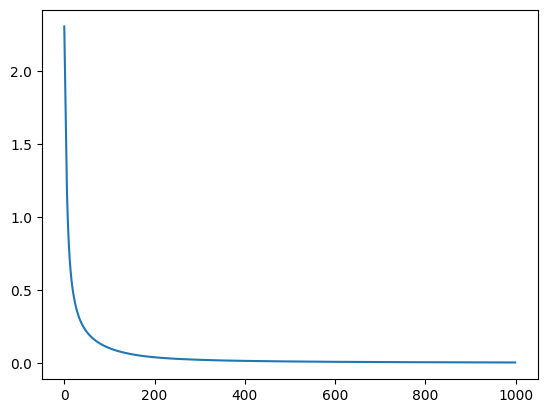

In [83]:
t = np.arange(0, iterations)
plt.plot(t, cost_list)
plt.show()

In [84]:
def accuracy(inp, labels, parameters):
    forward_cache = forward_propagation(inp, parameters)
    a_out = forward_cache['a2']   # containes propabilities with shape(10, 1)
    
    a_out = np.argmax(a_out, 0)  # 0 represents row wise 
    
    labels = np.argmax(labels, 0)
    
    acc = np.mean(a_out == labels)*100
    
    return acc

In [86]:
print("Accuracy of Train Dataset", accuracy(X_train, Y_train, parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(X_test, Y_test, parameters), 2), "%")

Accuracy of Train Dataset 100.0 %
Accuracy of Test Dataset 84.0 %


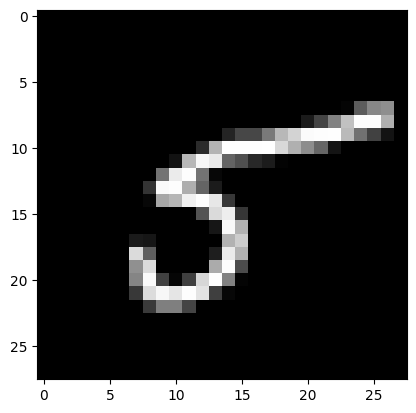

Our model says it is : 5


In [90]:
idx = int(random.randrange(0,X_test.shape[1]))
plt.imshow(X_test[:, idx].reshape((28,28)),cmap='gray')
plt.show()

cache = forward_propagation(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), parameters)
a_pred = cache['a2']  
a_pred = np.argmax(a_pred, 0)

print("Our model says it is :", a_pred[0])